# Aprendizagem de Máquina, classificação dos incidentes em "Level 1" ou "Level 2"
   5. A liderança do Departamento de Polícia de Seattle manifestou o interesse em uma aplicação que classifica os incidentes em "Level 1" ou "Level 2" com base em outras colunas da tabela e lhe requisitou um parecer sobre esta proposta. Descreva os desafios envolvidos, enumere fatores que fomentem a criação deste classificador e sugira um modelo estatístico para executar esta tarefa, justificando a sua escolha. P.S.: Sua justificativa deve conter explicação teórica de ao menos dois algoritmos, um benchmark destas soluções candidatas de tempo e performance, os experimentos e análise do bias variance threshold.

## Desafios envolvidos
   1: Testa vários algoritmos para analisar qual algoritmo consegue um bom desempenho.  
   2: Confiabilidade dos dados, usar métodos de treinamento e avaliação de forma que os modelos conseguem generalizar os dados.
   
   3: Realizar vários testes com a retirada e a substituição de dados faltosos,  pode haver efeitos nos desempenhos dos modelos com a  retirado ou fazendo a substituição dos dados faltosos.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from yellowbrick.classifier import ClassificationReport
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from IPython.display import Image
from IPython.core.display import HTML 

/home/bruno/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### Leitura dos dados 

In [2]:
data = pd.read_csv('./../use-of-force.csv')
data.loc[data.Sector == '-', 'Sector'] = np.nan # Substituto o caractere ‘_’ por um valor nulo numérico  
data

,ID,Incident_Num,Incident_Type,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender
0,18412-2238-14470,18412,Level 1 - Use of Force,2017-11-28T01:40:00,NaN,NaN,NaN,2238,14470,Black or African American,Female
1,16162-1589-12833,16162,Level 1 - Use of Force,2017-06-22T04:15:00,NaN,NaN,NaN,1589,12833,Black or African American,Male
2,15041-2017-12130,15041,Level 1 - Use of Force,2017-03-30T15:59:00,NaN,NaN,NaN,2017,12130,White,Male
3,29139-4759-15571,29139,Level 1 - Use of Force,2018-02-15T13:06:00,NaN,NaN,NaN,4759,15571,Black or African American,Male
4,30425-4745-16299,30425,Level 1 - Use of Force,2018-07-17T21:00:00,NaN,NaN,NaN,4745,16299,White,Female
...,...,...,...,...,...,...,...,...,...,...,...
8056,31379-1261-17409,31379,Level 1 - Use of Force,2018-08-02T10:55:00,NaN,NaN,NaN,1261,17409,Black or African American,Male
8057,31434-1067-17417,31434,Level 1 - Use of Force,2018-08-02T18:35:00,NaN,NaN,NaN,1067,17417,NaN,Male
8058,31581-2323-17456,31581,Level 1 - Use of Force,2018-08-06T19:10:00,NaN,NaN,NaN,2323,17456,Black or African American,Male
8059,31784-2455-16869,31784,Level 1 - Use of Force,2018-08-09T15:00:00,NaN,NaN,NaN,2455,16869,White,Male


### Analisando os valores faltosos 
   * Como pode ser analisado na imagem abaixo existem vários valores faltosos, as colunas que possui valores faltosos são: ‘Precinct’, 'Sector', 'Beat', 'Subject_Race', 'Subject_Gender', com a coluna ‘Subject_Race’ possuindo muitos valores faltosos. Com isso será realizados testes com a substituição e a retiradas dos dados faltosos

<AxesSubplot:>

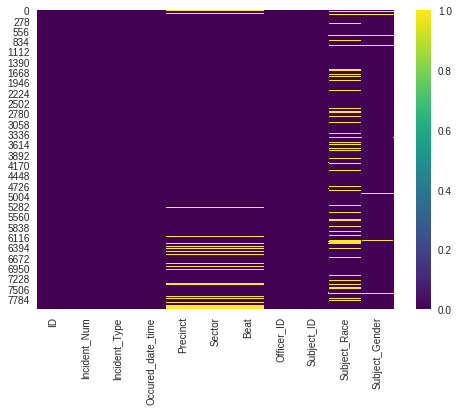

In [3]:
# Plotar valores faltosos
sns.heatmap(data.isnull(), cmap='viridis')

### Realizando a substituição dos valores faltosos
   Para a tarefa de substituição de dados faltosos é usado o [LabelEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html), com a [fit_transform()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) função fornecida por [LabelEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) com isso será substituído os valores faltosos e também  será transformado os valores que são texto em valores numéricos, dessa forma cada valor que estava em forma de texto será representado de forma numérica.

In [4]:

encoder = LabelEncoder()
data_sub = data.copy()

# Transformando os valores faltosos números  em strings ‘_’, para usar a função fit_transform da classe LabelEncoder()
data_sub['Precinct'] = data_sub['Precinct'].fillna('_')
data_sub['Sector'] = data_sub['Sector'].fillna('_')
data_sub['Beat'] = data_sub['Beat'].fillna('_')
data_sub['Subject_Race'] = data_sub['Subject_Race'].fillna('_')
data_sub['Subject_Gender'] = data_sub['Subject_Gender'].fillna('_')

# Realizando a substitução dos valores faltosos na colunas que possui esses valores
# E também stransformando os valores que são texto em valores numéricos
data_sub['Precinct'] = encoder.fit_transform(data_sub['Precinct'])
data_sub['Sector'] = encoder.fit_transform(data_sub['Sector'])
data_sub['Beat'] = encoder.fit_transform(data_sub['Beat'])
data_sub['Subject_Race'] = encoder.fit_transform(data_sub['Subject_Race'])
data_sub['Subject_Gender'] = encoder.fit_transform(data_sub['Subject_Gender'])
data_sub

,ID,Incident_Num,Incident_Type,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender
0,18412-2238-14470,18412,Level 1 - Use of Force,2017-11-28T01:40:00,6,19,53,2238,14470,2,0
1,16162-1589-12833,16162,Level 1 - Use of Force,2017-06-22T04:15:00,6,19,53,1589,12833,2,1
2,15041-2017-12130,15041,Level 1 - Use of Force,2017-03-30T15:59:00,6,19,53,2017,12130,5,1
3,29139-4759-15571,29139,Level 1 - Use of Force,2018-02-15T13:06:00,6,19,53,4759,15571,2,1
4,30425-4745-16299,30425,Level 1 - Use of Force,2018-07-17T21:00:00,6,19,53,4745,16299,5,0
...,...,...,...,...,...,...,...,...,...,...,...
8056,31379-1261-17409,31379,Level 1 - Use of Force,2018-08-02T10:55:00,6,19,53,1261,17409,2,1
8057,31434-1067-17417,31434,Level 1 - Use of Force,2018-08-02T18:35:00,6,19,53,1067,17417,6,1
8058,31581-2323-17456,31581,Level 1 - Use of Force,2018-08-06T19:10:00,6,19,53,2323,17456,2,1
8059,31784-2455-16869,31784,Level 1 - Use of Force,2018-08-09T15:00:00,6,19,53,2455,16869,5,1


### Pegando as classes dos dados e realizando a transformação e normalização dos dados (Dataset com a substituição dos dados faltosos ).
   Para essa tarefa é usado o [OrdinalEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) com a função [fit_transform()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

In [5]:
trans = OrdinalEncoder()

# Pegando as classes dos dados (Level 1 - Use of Force, Level 2 - Use of Force )
y_data_sub = encoder.fit_transform(data_sub['Incident_Type'])
# Retirando a coluna das classes do dataset
x_data_sub = data_sub.drop(columns='Incident_Type', axis=1)

# Realizando a normalização dos dados e tranformando o formato do daset
x_data_sub = trans.fit_transform(x_data_sub)
x_data_sub.shape

(8061, 10)

### Criando outro conjunto de dados para realizar a retirada dos dados faltosos 

In [6]:
# Retirando as linhas onde existem dados faltosos
data_del = data.copy()
data_del = data_del.dropna()
data_del.shape


(6242, 11)

### Pegando as classes dos dados e realizando a transformação e normalização dos dados (Dataset com a retirada  dos dados faltosos ).
Para essa tarefa é usado o [OrdinalEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) com a função [fit_transform()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

In [7]:
#Pegando as classes dos dados (Level 1 - Use of Force, Level 2 - Use of Force )
y_data_del = encoder.fit_transform(data_del['Incident_Type'])
# Retirando a coluna das classes do dataset
x_data_del = data_del.drop(columns='Incident_Type', axis=1)

# # Realizando a normalização dos dados e tranformando o formato do daset
x_data_del = trans.fit_transform(x_data_del)
x_data_del.shape

(6242, 10)

### Método de treinamento e validação dos modelos  
   Para o controle de Overfitting o modelos são treinados com o método [K-fold cross validation](https://machinelearningmastery.com/k-fold-cross-validation/), dessa forma todo o conjunto de dados uma hora vai ser teste, com isso o modelo consegue generalizar melhor os dados.
  

In [8]:
Image(url= "https://scikit-learn.org/stable/_images/grid_search_cross_validation.png", width=500, height=900)

In [32]:
# Função para realizar o treinamneto com K-Fold e plotar os resultados
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    # Realizando o treinamento com k-Fold
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Accuracy")


    # Plot learning curve
    axes[0].grid(True)
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                             train_scores_mean + train_scores_std, alpha=0.1,
                             color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                             test_scores_mean + test_scores_std, alpha=0.1,
                             color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                     label="Training Accuracy")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                     label="Cross-validation Accuracy")
    axes[0].legend(loc="best")

        # Plot n_samples vs fit_times
    axes[1].grid(True)
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                             fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("Times (Milliseconds)")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid(True)
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                             test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("Times (Milliseconds)")
    axes[2].set_ylabel("Accuracy")
    axes[2].set_title("Performance of the model")

    plt.show()
    return [np.mean(test_scores_mean), sum(fit_times_mean)]

### Classificador Naive Bayes
   * Os métodos [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) são um conjunto de algoritmos de aprendizagem supervisionada com base na aplicação do teorema de Bayes com a suposição "ingênua" de independência condicional entre cada par de recursos dado o valor da variável de classe. O teorema de Bayes afirma a seguinte relação, dada a variável de classe $y$ e o vetor de características dependentes $x_1$ a $x_n$. A Variação usada é o [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB).

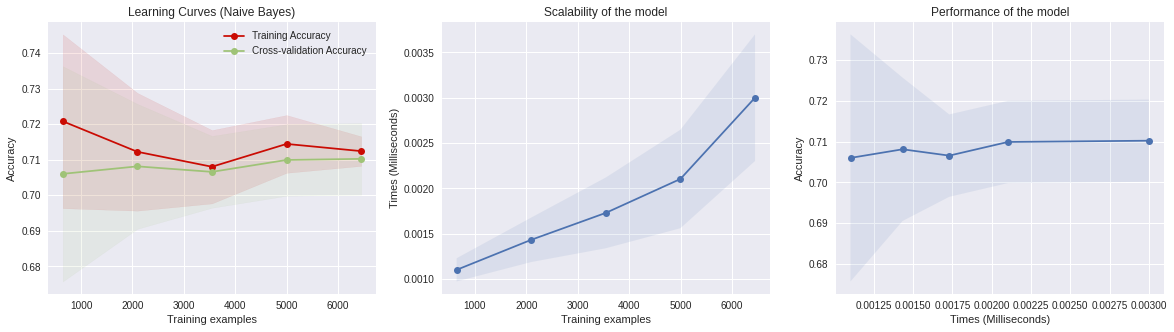

In [33]:
# Realizando o treinamneto e teste do Naive Bayes 
# com o conjuto de dados com os valores faltasos substituidos

plt.style.use('seaborn')

title = "Learning Curves (Naive Bayes)"
# Validação cruzada com o numero de K = 10
# Usando 20% para teste a cada treinamento
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = GaussianNB()
reults_nav_sub = plot_learning_curve(estimator, title, x_data_sub, y_data_sub,
                    cv=cv, n_jobs=4)

In [34]:
# Acuracia media e o tempo total de treinametno Naive Bayes
reults_nav_sub

[0.7081711097334159, 0.009370946884155275]

### Classificador Multi-layer Perceptron (MLP)
   * Multi-layer Perceptron [(MLP)](https://scikit-learn.org/stable/modules/neural_networks_supervised.html) é um algoritmo de aprendizado supervisionado que aprende uma função $ f(x) = R^m \rightarrow  R^o$ treinando em um conjunto de dados, onde  é o número de dimensões para entrada e é o número de dimensões para saída. Dado um conjunto de recursos $X = x_1, x_2....x_n$
 e um alvo $y$, ele pode aprender um aproximador de função não linear para classificação ou regressão. É diferente da regressão logística, pois entre a camada de entrada e a de saída pode haver uma ou mais camadas não lineares, chamadas camadas ocultas


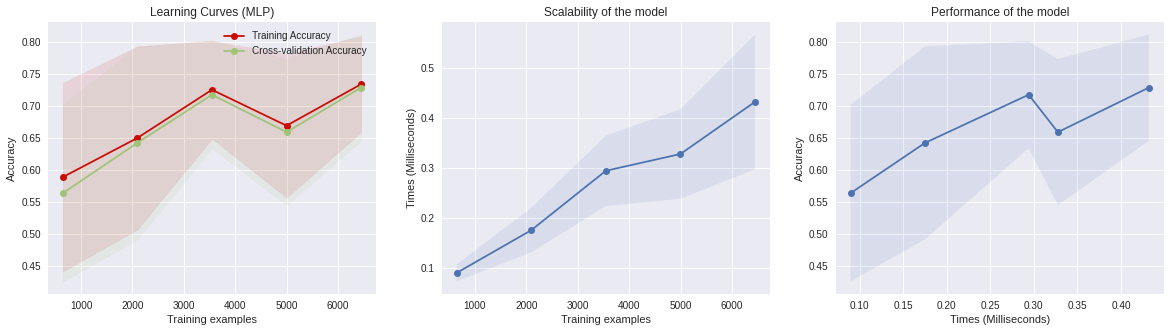

In [37]:
# Realizando o treinamento e teste da MLP 
# com o conjuto de dados com os valores faltasos substituidos

plt.style.use('seaborn')

title = "Learning Curves (MLP)"
# Validação cruzada com o numero de K = 10
# Usando 20% para teste a cada treinamento
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

mlp= MLPClassifier()
results_mlp_sub = plot_learning_curve(mlp, title, x_data_sub, y_data_sub,
                    cv=cv, n_jobs=4)

In [38]:
# Acuracia media e o tempo total de treinametno da MLP
results_mlp_sub

[0.6620334779913205, 1.318203067779541]

### O [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)  é um tipo de algoritmo de aprendizado de máquina supervisionado baseado no aprendizado de conjunto. O aprendizado por conjunto é um tipo de aprendizado no qual você junta diferentes tipos de algoritmos ou o mesmo algoritmo várias vezes para formar um modelo de previsão.

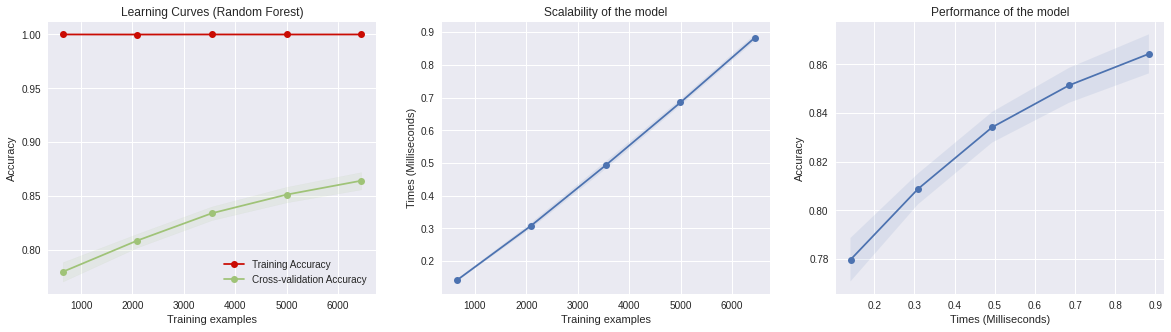

In [39]:
# Realizando o treinamento e teste do Random Forest 
# com o conjuto de dados com os valores faltasos substituidos
plt.style.use('seaborn')

title = "Learning Curves (Random Forest)"
# Validação cruzada com o numero de K = 10
# Usando 20% para teste a cada treinamento
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

clf = RandomForestClassifier(n_estimators=100) # 100 teste de algoritmos diferentes
results_clf_sub = plot_learning_curve(clf, title, x_data_sub, y_data_sub,
                    cv=cv, n_jobs=4)

In [40]:
# Acuracia media e o tempo total de treinametno do Random Forest
results_clf_sub

[0.8276875387476753, 2.5124855756759645]

## Realizando a classificação com o conjunto de dados faltosos deletados 

### Naive Bayes

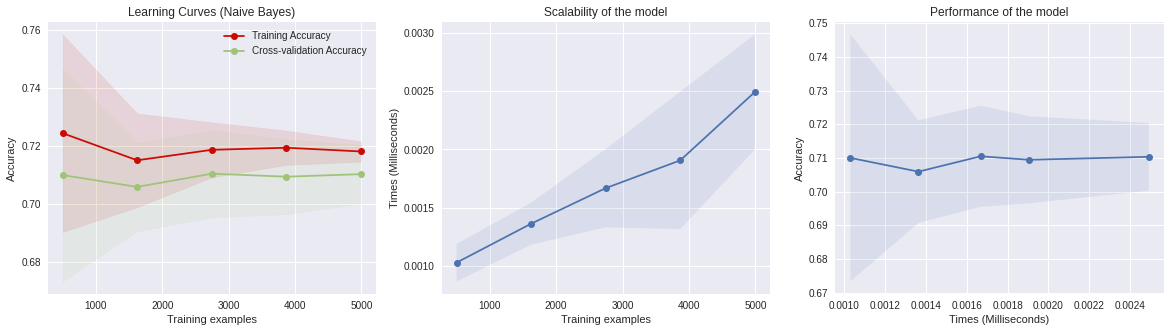

In [41]:
# Realizando o treinamneto e teste do Naive Bayes 
# com o conjuto de dados com os valores faltasos substituidos
plt.style.use('seaborn')

title = "Learning Curves (Naive Bayes)"
# Validação cruzada com o numero de K = 10
# Usando 20% para teste a cada treinamento
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = GaussianNB()
reults_nav_del = plot_learning_curve(estimator, title, x_data_del, y_data_del,
                    cv=cv, n_jobs=4)

In [42]:
# Acuracia media e o tempo total de treinametno do Naive Bayes
reults_nav_del

[0.7092393915132107, 0.008456206321716309]

### MLP

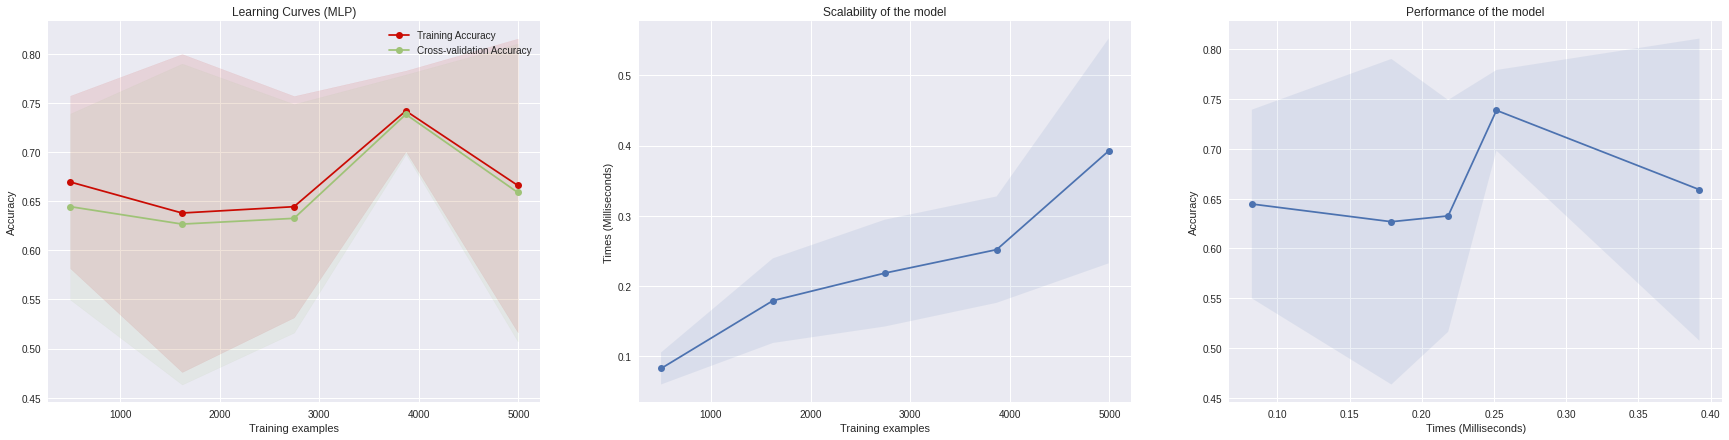

In [18]:
# Realizando o treinamento e teste da MLP 
# com o conjuto de dados com os valores faltasos substituidos
plt.style.use('seaborn')

title = "Learning Curves (MLP)"
# Validação cruzada com o numero de K = 10
# Usando 20% para teste a cada treinamento
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

mlp= MLPClassifier()
reults_mlp_del = plot_learning_curve(mlp, title, x_data_del, y_data_del,
                    cv=cv, n_jobs=4)

In [19]:
# Acuracia media e o tempo total de treinametno da MLP
reults_mlp_del

[0.6603522818254604, 1.1234884023666383]

### Random Forest

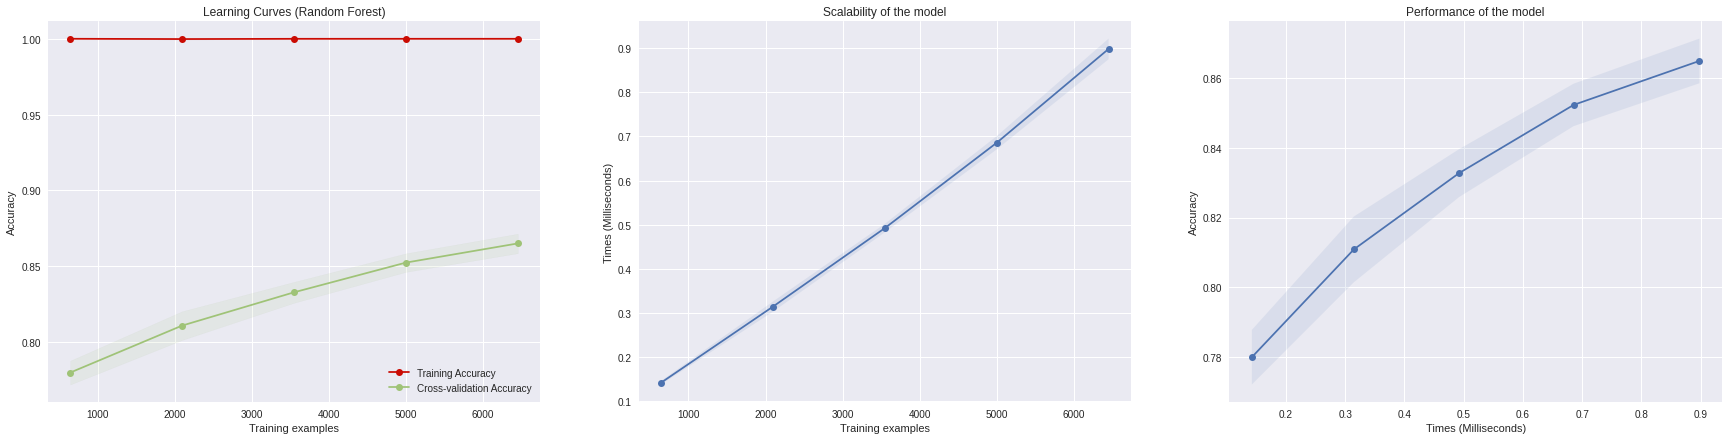

In [20]:
# Realizando o treinamento e teste do Random Forest 
# com o conjuto de dados com os valores faltasos substituidos
plt.style.use('seaborn')

title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

clf = RandomForestClassifier(n_estimators=100)# 100 teste de algoritmos diferentes
reults_clf_del = plot_learning_curve(clf, title, x_data_sub, y_data_sub,
                    cv=cv, n_jobs=4)

In [21]:
# Acuracia media e o tempo total de treinametno da Random Forest
reults_clf_del

[0.8281835089894607, 2.533322548866272]

### Comparando o desempenho dos classificadores usando o conjunto de dados com valores faltosos substituídos
   * No gráfico abaixo pode-se observar que o algoritmo que teve melhor desempenho foi o Random Forest com 82.76%  de acurácia. 

Text(0.5, 1.0, 'Acurácia com valores faltosos substituidos')

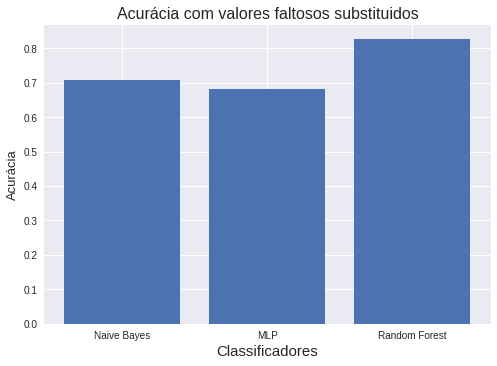

In [22]:
plt.style.use('seaborn')
plt.bar(['Naive Bayes', 'MLP', 'Random Forest'],[reults_nav_sub[0], results_mlp_sub[0], results_clf_sub[0]])
plt.ylabel('Acurácia',  fontsize=13)
plt.xlabel('Classificadores',  fontsize=15)
plt.title('Acurácia com valores faltosos substituidos', fontsize = 16)

### Comparando o desempenho dos classificadores usando o conjunto de dados com valores faltosos deletados
   * No gráfico abaixo pode-se observar que o algoritmo que teve melhor desempenho foi o Random Forest com 82.76% de acurácia.

Text(0.5, 1.0, 'Acurácia com valores faltosos deletados')

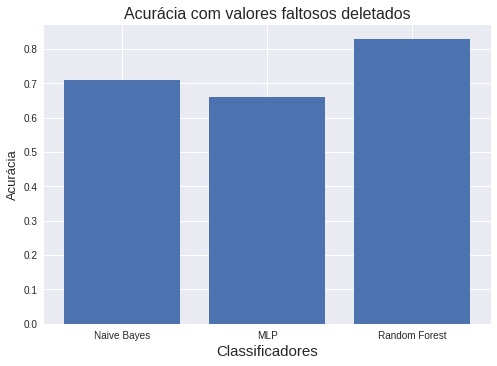

In [23]:
plt.style.use('seaborn')
plt.bar(['Naive Bayes', 'MLP', 'Random Forest'],[reults_nav_del[0], reults_mlp_del[0], reults_clf_del[0]])
plt.ylabel('Acurácia',  fontsize=13)
plt.xlabel('Classificadores',  fontsize=15)
plt.title('Acurácia com valores faltosos deletados', fontsize = 16)

### Comparando o tempo de processamneto dos classificadores usando o conjunto de dados com valores faltosos substituidos¶
 * No gráfico abaixo pode-se observar que o algoritmo que o menor custo de execução foi o Naive Bayes. 

Text(0.5, 1.0, 'Tempo em Milissegundos com valores faltosos Substituidos')

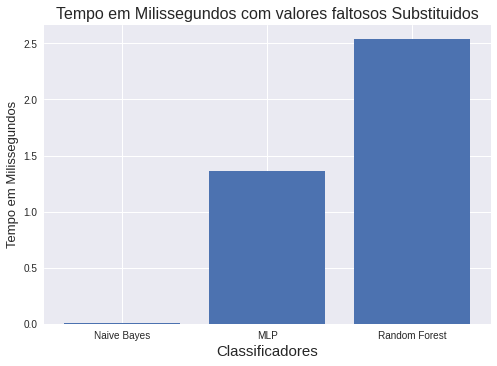

In [24]:
plt.style.use('seaborn')
plt.bar(['Naive Bayes', 'MLP', 'Random Forest'],[reults_nav_sub[1], results_mlp_sub[1], results_clf_sub[1]])
plt.ylabel('Tempo em Milissegundos',  fontsize=13)
plt.xlabel('Classificadores',  fontsize=15)
plt.title('Tempo em Milissegundos com valores faltosos Substituidos', fontsize = 16)

### Comparando o tempo de processamneto dos classificadores usando o conjunto de dados com valores faltosos deletados¶
 * No gráfico abaixo pode-se observar que o algoritmo que o menor custo de execução foi o Naive Bayes. 

Text(0.5, 1.0, 'Tempo em Milissegundos com valores faltosos deletados')

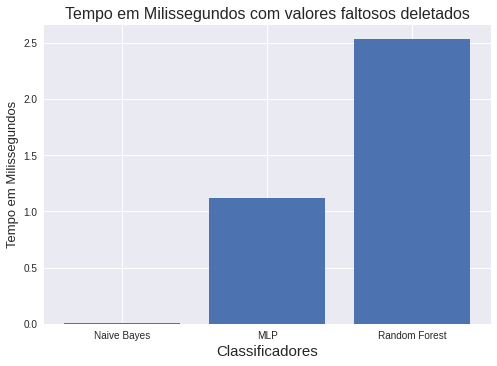

In [25]:
plt.style.use('seaborn')
plt.bar(['Naive Bayes', 'MLP', 'Random Forest'],[reults_nav_del[1], reults_mlp_del[1], reults_clf_del[1]])
plt.ylabel('Tempo em Milissegundos',  fontsize=13)
plt.xlabel('Classificadores',  fontsize=15)
plt.title('Tempo em Milissegundos com valores faltosos deletados', fontsize = 16)

## Analisando os resultados  